# 1) Prepare a classification model using Naive Bayes 
for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

# Import dataset

In [9]:
salarydata_train = pd.read_csv("C:/Users/Admin/Downloads/SalaryData_Train.csv.crdownload")
salarydata_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
salarydata_test = pd.read_csv("C:/Users/Admin/Downloads/SalaryData_Test.csv)
salarydata_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# Exploratory data analysis

In [12]:


salarydata_train.shape

(8798, 14)

We can see that there are 30161 instances and 14 attributes in the training data set.

In [13]:
salarydata_test.shape

(15060, 14)

# View top 5 rows of dataset

In [14]:
# preview the Training dataset

salarydata_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
# preview the Test dataset

salarydata_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# View summary of Training dataset

In [16]:
salarydata_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8798 entries, 0 to 8797
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            8798 non-null   int64 
 1   workclass      8798 non-null   object
 2   education      8798 non-null   object
 3   educationno    8798 non-null   int64 
 4   maritalstatus  8798 non-null   object
 5   occupation     8798 non-null   object
 6   relationship   8798 non-null   object
 7   race           8798 non-null   object
 8   sex            8798 non-null   object
 9   capitalgain    8798 non-null   int64 
 10  capitalloss    8798 non-null   int64 
 11  hoursperweek   8798 non-null   int64 
 12  native         8797 non-null   object
 13  Salary         8797 non-null   object
dtypes: int64(5), object(9)
memory usage: 962.4+ KB


In [17]:
salarydata_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,8798.000000,8798.000000,8798.000000,8798.000000,8798.000000
mean,38.323028,10.111389,1100.164469,90.758922,41.068425
std,13.084722,2.526946,7480.402902,405.750307,11.879711
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,2824.000000,99.000000


In [18]:
salarydata_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [19]:
salarydata_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [20]:
#Finding the special characters in the data frame 
salarydata_train.isin(['?']).sum(axis=0)


age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [21]:
#Finding the special characters in the data frame 
salarydata_test.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [22]:
print(salarydata_train[0:5])

   age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1           

# Explore categorical variables

In [23]:
# find categorical variables

categorical = [var for var in salarydata_train.columns if salarydata_train[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [24]:
# view the categorical variables

salarydata_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


Summary of categorical variables

There are 9 categorical variables.

The categorical variables are given by workclass, education, maritalstatus, occupation, relationship, race, sex, native and Salary.

Salary is the target variable.

# Explore problems within categorical variables

In [25]:
# check missing values in categorical variables
salarydata_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           1
Salary           1
dtype: int64

In [26]:
# view frequency counts of values in categorical variables

for var in categorical: 
    
    print(salarydata_train[var].value_counts())
    

 Private             6501
 Self-emp-not-inc     755
 Local-gov            595
 State-gov            373
 Self-emp-inc         318
 Federal-gov          254
 Without-pay            2
Name: workclass, dtype: int64
 HS-grad         2884
 Some-college    1988
 Bachelors       1462
 Masters          473
 Assoc-voc        369
 11th             310
 Assoc-acdm       287
 10th             250
 7th-8th          171
 Prof-school      158
 9th              135
 Doctorate         98
 12th              90
 5th-6th           72
 1st-4th           39
 Preschool         12
Name: education, dtype: int64
 Married-civ-spouse       4097
 Never-married            2840
 Divorced                 1245
 Separated                 277
 Widowed                   225
 Married-spouse-absent     108
 Married-AF-spouse           6
Name: maritalstatus, dtype: int64
 Prof-specialty       1160
 Exec-managerial      1149
 Craft-repair         1130
 Adm-clerical         1109
 Sales                1100
 Other-service      

In [27]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(salarydata_train[var].value_counts()/np.float(len(salarydata_train)))

 Private             0.738918
 Self-emp-not-inc    0.085815
 Local-gov           0.067629
 State-gov           0.042396
 Self-emp-inc        0.036145
 Federal-gov         0.028870
 Without-pay         0.000227
Name: workclass, dtype: float64
 HS-grad         0.327802
 Some-college    0.225960
 Bachelors       0.166174
 Masters         0.053762
 Assoc-voc       0.041941
 11th            0.035235
 Assoc-acdm      0.032621
 10th            0.028416
 7th-8th         0.019436
 Prof-school     0.017959
 9th             0.015344
 Doctorate       0.011139
 12th            0.010230
 5th-6th         0.008184
 1st-4th         0.004433
 Preschool       0.001364
Name: education, dtype: float64
 Married-civ-spouse       0.465674
 Never-married            0.322801
 Divorced                 0.141509
 Separated                0.031484
 Widowed                  0.025574
 Married-spouse-absent    0.012276
 Married-AF-spouse        0.000682
Name: maritalstatus, dtype: float64
 Prof-specialty       0.13184

In [28]:
# check labels in workclass variable

salarydata_train.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [29]:
# check frequency distribution of values in workclass variable

salarydata_train.workclass.value_counts()

 Private             6501
 Self-emp-not-inc     755
 Local-gov            595
 State-gov            373
 Self-emp-inc         318
 Federal-gov          254
 Without-pay            2
Name: workclass, dtype: int64

# Explore occupation variable

In [30]:
# check labels in occupation variable

salarydata_train.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [31]:
# check frequency distribution of values in occupation variable

salarydata_train.occupation.value_counts()

 Prof-specialty       1160
 Exec-managerial      1149
 Craft-repair         1130
 Adm-clerical         1109
 Sales                1100
 Other-service         950
 Machine-op-inspct     580
 Transport-moving      473
 Handlers-cleaners     375
 Farming-fishing       278
 Tech-support          269
 Protective-serv       187
 Priv-house-serv        36
 Armed-Forces            2
Name: occupation, dtype: int64

# Explore native_country variable

In [32]:
# check labels in native_country variable

salarydata_train.native.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', nan], dtype=object)

In [33]:
# check frequency distribution of values in native_country variable

salarydata_train.native.value_counts()

 United-States                 8008
 Mexico                         187
 Philippines                     45
 Canada                          40
 Germany                         38
 Puerto-Rico                     34
 Cuba                            29
 Jamaica                         28
 England                         25
 El-Salvador                     25
 China                           24
 India                           23
 South                           21
 Dominican-Republic              21
 Vietnam                         21
 Poland                          20
 Japan                           19
 Iran                            19
 Guatemala                       19
 Italy                           18
 Greece                          17
 Taiwan                          15
 Portugal                        11
 Haiti                           11
 Columbia                         9
 Nicaragua                        8
 Ecuador                          7
 Thailand                   

# Number of labels: cardinality

In [34]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(salarydata_train[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  41  labels
Salary  contains  3  labels


# Explore Numerical Variables


In [35]:
# find numerical variables

numerical = [var for var in salarydata_train.columns if salarydata_train[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [36]:
# view the numerical variables

salarydata_train[numerical].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


Summary of numerical variables

There are 5 numerical variables.

These are given by age, educationno, capitalgain, capitalloss and hoursperweek. All of the numerical variables are of discrete data type.

# Explore problems within numerical variables

In [37]:
# check missing values in numerical variables

salarydata_train[numerical].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

# Declare feature vector and target variable

In [38]:
X = salarydata_train.drop(['Salary'], axis=1)

y = salarydata_train['Salary']

# Split data into separate training and test set

In [39]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [40]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((6158, 13), (2640, 13))

# Feature Engineering

In [41]:
X_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [42]:
X_test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [43]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [44]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [45]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

workclass        0.0
education        0.0
maritalstatus    0.0
occupation       0.0
relationship     0.0
race             0.0
sex              0.0
native           0.0
dtype: float64

In [46]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

In [47]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native'].fillna(X_train['native'].mode()[0], inplace=True)  

In [48]:

# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [49]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [50]:
# check missing values in X_train

X_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [51]:

# check missing values in X_test

X_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

# Encode categorical variables

In [52]:
# print categorical variables

categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [53]:

X_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native
4582,Private,HS-grad,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
6280,Local-gov,Bachelors,Never-married,Prof-specialty,Not-in-family,White,Female,United-States
6222,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,Mexico
6307,Private,Assoc-voc,Widowed,Prof-specialty,Not-in-family,White,Female,United-States
5794,Private,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States


In [54]:
!pip install category_encoders

     -------------------------------------- 81.9/81.9 kB 918.2 kB/s eta 0:00:00


In [55]:
# import category encoders

import category_encoders as ce

In [56]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 
                                 'race', 'sex', 'native'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [57]:
X_train.head()


,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_30,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39
4582,26,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6280,47,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6222,20,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6307,58,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5794,43,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:

X_train.shape

(6158, 101)

In [59]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_30,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39
6753,31,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4301,23,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1675,19,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1139,35,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6884,27,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [60]:

X_test.shape

(2640, 101)

We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling.

# Feature Scaling

In [61]:
cols = X_train.columns

In [62]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [63]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [64]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [65]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_30,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39
0,-0.578947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.526316,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.894737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.105263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.315789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We now have X_train dataset ready to be fed into the Gaussian Naive Bayes classifier.

# Model training

In [66]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

# Predict the results

In [67]:
y_pred = gnb.predict(X_test)

y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

# Check accuracy score

In [73]:
from sklearn.metrics import accuracy_score

# Convert both y_test and y_pred to the same data type (either str or float)
y_test = y_test.astype(str)  # or y_test.astype(float)
y_pred = y_pred.astype(str)  # or y_pred.astype(float)

# Now calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy score: {0:0.4f}'.format(accuracy))


Model accuracy score: 0.7947


# Check for overfitting and underfitting

In [74]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.7985
Test set score: 0.7947


# Compare model accuracy with null accuracy

In [75]:
# check class distribution in test set

y_test.value_counts()

 <=50K    2015
 >50K      624
nan          1
Name: Salary, dtype: int64

In [76]:
# check null accuracy score

null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


# Confusion matrix


In [77]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1581  434    0]
 [ 107  517    0]
 [   0    1    0]]

True Positives(TP) =  1581

True Negatives(TN) =  517

False Positives(FP) =  434

False Negatives(FN) =  107


<Axes: >

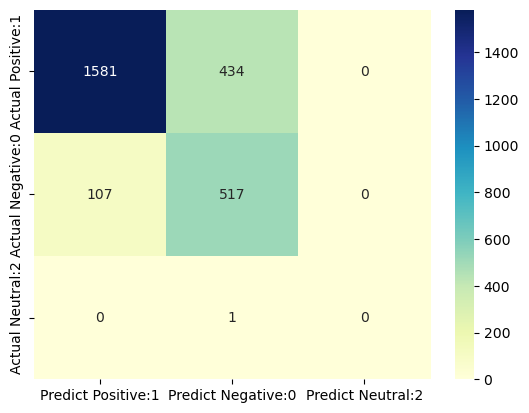

In [79]:
import seaborn as sns
import pandas as pd

# Assuming cm is a 3x3 confusion matrix
cm_matrix = pd.DataFrame(data=cm, columns=['Predict Positive:1', 'Predict Negative:0', 'Predict Neutral:2'],
                          index=['Actual Positive:1', 'Actual Negative:0', 'Actual Neutral:2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


# Classification metrices

In [80]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.94      0.78      0.85      2015
        >50K       0.54      0.83      0.66       624
         nan       0.00      0.00      0.00         1

    accuracy                           0.79      2640
   macro avg       0.49      0.54      0.50      2640
weighted avg       0.84      0.79      0.81      2640



# Classification accuracy

In [81]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [82]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7950


# Classification error

In [83]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2050


# Precision

# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

# Recall

In [85]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9366


In [86]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9366


# False Positive Rate

In [87]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4564


# Specificity

In [88]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5436


# Calculate class probabilities

In [89]:
y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[9.99998885e-01, 1.11518444e-06],
       [9.99999436e-01, 5.64472954e-07],
       [9.99999445e-01, 5.55319826e-07],
       [8.86056942e-01, 1.13943058e-01],
       [5.58026286e-03, 9.94419737e-01],
       [4.06803091e-02, 9.59319691e-01],
       [9.34461618e-04, 9.99065538e-01],
       [3.68679257e-03, 9.96313207e-01],
       [9.99634421e-01, 3.65578724e-04],
       [9.98653450e-01, 1.34654959e-03]])

Observations

In each row, the numbers sum to 1.

There are 2 columns which correspond to 2 classes - <=50K and >50K.

  * Class 0 => <=50K - Class that a person makes less than equal to 50K.

  * Class 1 => >50K - Class that a person makes more than 50K.

Importance of predicted probabilities

We can rank the observations by probability of whether a person makes less than or equal to 50K or more than 50K.
predict_proba process

Predicts the probabilities

Choose the class with the highest probability

Classification threshold level

There is a classification threshold level of 0.5.

Class 0 => <=50K - probability of salary less than or equal to 50K is predicted if probability < 0.5.

Class 1 => >50K - probability of salary more than 50K is predicted if probability > 0.5.

In [90]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,0.999999,1.115184e-06
1,0.999999,5.644730e-07
2,0.999999,5.553198e-07
3,0.886057,1.139431e-01
4,0.005580,9.944197e-01
5,0.040680,9.593197e-01
6,0.000934,9.990655e-01
7,0.003687,9.963132e-01
8,0.999634,3.655787e-04
9,0.998653,1.346550e-03


In [91]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10, 1]

array([1.11518444e-06, 5.64472954e-07, 5.55319826e-07, 1.13943058e-01,
       9.94419737e-01, 9.59319691e-01, 9.99065538e-01, 9.96313207e-01,
       3.65578724e-04, 1.34654959e-03])

In [92]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

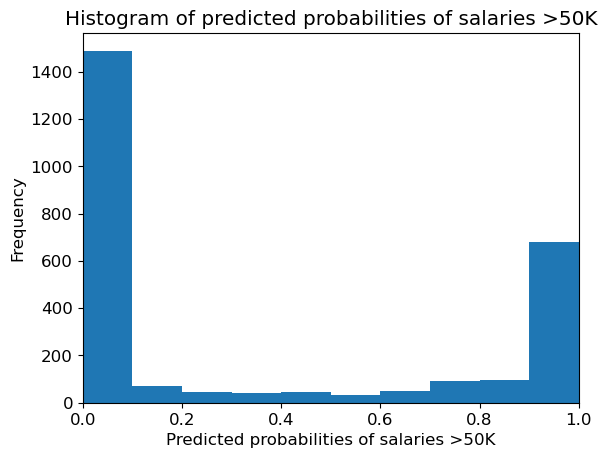

In [93]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

# ROC - AUC

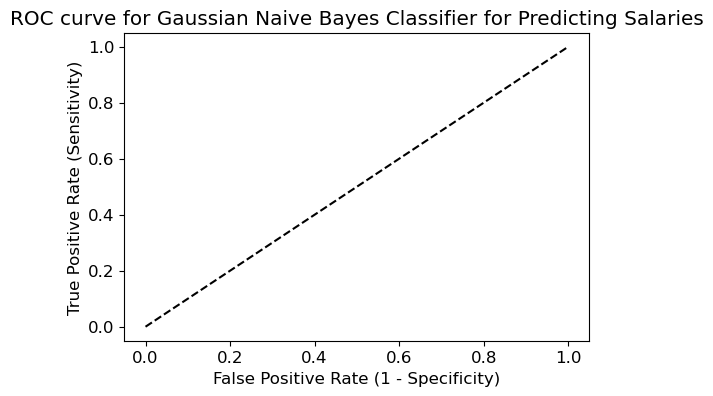

In [94]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [99]:
from sklearn.metrics import roc_auc_score

# Assuming y_pred1 contains predicted probabilities for each class
# and y_test contains true class labels

# Generate some example data
y_test = [0, 1, 2, 0, 1]
y_pred1 = [
    [0.2, 0.3, 0.5],  # Predicted probabilities for class 0, 1, 2 for the first sample
    [0.7, 0.2, 0.1],  # Predicted probabilities for class 0, 1, 2 for the second sample
    [0.3, 0.4, 0.3],  # Predicted probabilities for class 0, 1, 2 for the third sample
    [0.8, 0.1, 0.1],  # ...
    [0.2, 0.5, 0.3]   # ...
]

# Convert y_pred1 to a NumPy array
y_pred1 = np.array(y_pred1)

# Compute ROC AUC
ROC_AUC = roc_auc_score(y_test, y_pred1, multi_class='ovr', average='weighted')

print('ROC AUC: {:.4f}'.format(ROC_AUC))


ROC AUC: 0.6250


# Interpretation

In [100]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8898


# k-Fold Cross Validation

In [101]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.7711039  0.82954545 0.77597403 0.79220779 0.78409091 0.82142857
 0.77922078 0.79707792 0.80162602 0.82113821]


In [102]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7973
